In [1]:
from eiscirc import ImpedanceModel
import numpy as np
import matplotlib.pyplot as plt

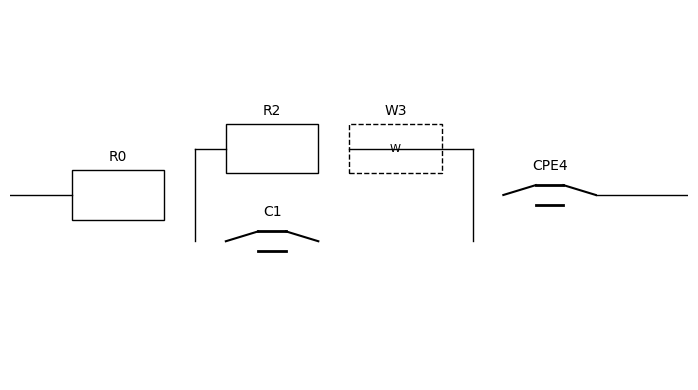

In [8]:
model = ImpedanceModel("R0-(C1//(R2-W3))-CPE4")
fig = model.draw_circuit(figsize=(10, 4))
plt.show()

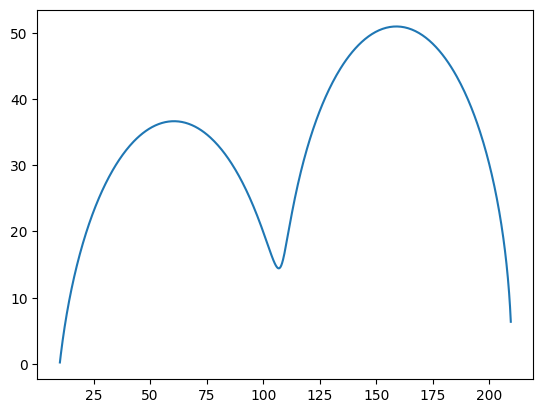

In [2]:
model = ImpedanceModel("R0-(R1//CPE1)-(R2//C2)")
omega = 2 * np.pi * np.logspace(-1, 6, 1000)  # 10 Hz to 1 MHz in rad/s
Z = model(omega, R0=10, R1=100, CPE1=(1e-6,0.8), R2=1e2, C2= 1e-3)
plt.plot(Z[:1000],-Z[1000:])

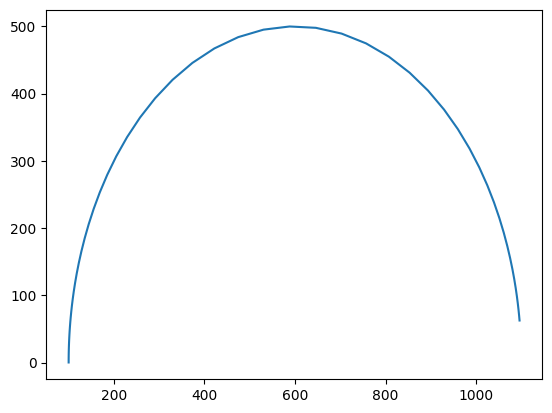

In [18]:
Z = model.impedance(omega, R0=100, R1=1000, C1=1e-6)
plt.plot(Z[:100],-Z[100:])